<a href="https://colab.research.google.com/github/stephaniePocci/ACMAIProject/blob/main/mnist_workthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# acmAI Project \#1 Walkthrough

## ⚙ 0.0 Setup

###⚙ 0.1 Import Python Modules

In [ ]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

### 0.2 Loading the Dataset

In [ ]:
# load training dataset
training_data = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# infometrics, not crucial to process
print(f'Training on {X_train.shape[0]} images. Each are {X_train.shape[1]}x{X_train.shape[2]}')
print(f'Testing  on {X_test.shape[0]} images. Each are {X_test.shape[1]}x{X_test.shape[2]}')


Training on 60000 images. Each are 28x28
Testing  on 10000 images. Each are 28x28


### 0.3 Visualizing the Dataset

Text(0.5, 1.0, 'Class 6')

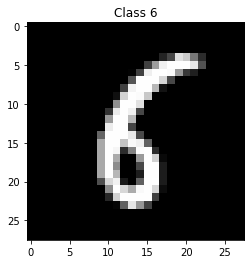

In [ ]:
# plot some example inputs to our model
%matplotlib inline
random_input = random.randint(0, len(X_train))
plt.imshow(X_train[random_input], cmap="gray")
plt.title(f'Class {Y_train[random_input]}')

In [ ]:
#@title v Run Me To Show Matrix Representation of the Above Image 
# just a little function for pretty printing a matrix (just for demonstration... this is not part of the ML model)
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[random_input])

0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0   35   70  223  202  119  44  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0    0    0    0    0    0   64  157  240  254  254  254  230  82  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0    0    0    0    3   66  239  254  254  250  153   56   31   0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0    0    0    0   85  254  254  254  214   71    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0    0    0   65  243  254  254  183   19    0    0    0    0   0  0  0  0 

### 0.4 Preparing the Dataset for Model Usage

In [ ]:
# reshape so computer has easier time handling data
'''
Example:

[1, 2,  ---> turns into --->  [1, 2, 3, 4]
 3, 4]
'''

X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.


# normalize so computer has easier time reading the numbers
'''
Example:
255 ---> turns into ---> 1.0
164 ---> turns into ---> 0.643
'''
X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers so we can normalize
X_test = X_test.astype('float32')
X_train /= 255.0                      # normalize all values [0, 255] to be in the range [0.0, 1.0] instead.
X_test /= 255.0

### 0.5 One-Hot Encode our Classes (Google me!)

In [ ]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

## ⚙ 1.0 Building The Model (Magic! 🎩✨)

### 1.1 Creating a Sequential-style Neural Network

In [ ]:
model = Sequential()

#### Example Neural Network
network.svg

### 1.2 Building the First Hidden Layer

In [ ]:
model.add(Dense(512, input_shape=(784,))) # adds first hidden layer (Google me!)
model.add(Activation('relu')) # Activation functions introduce non-linearity to our classification model (Google me!)
model.add(Dropout(0.2))
# Dropout zeroes a selection of random outputs (i.e., disables their activation)
# Dropout helps protect the model from memorizing or "overfitting" the training data.
# Google me!


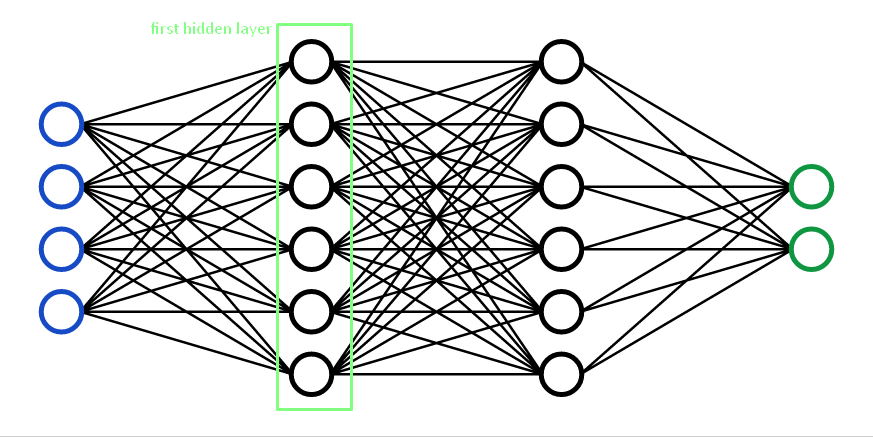

### 1.3 Building the Second Hidden Layer

In [ ]:
model.add(Dense(512, input_shape=(784,))) # adds first hidden layer (Google me!)
model.add(Activation('relu')) # Activation functions introduce non-linearity to our classification model (Google me!)
model.add(Dropout(0.2))

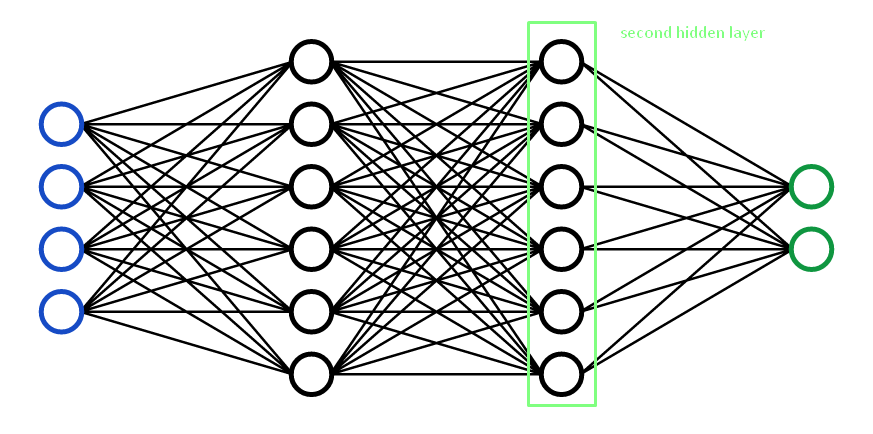

### 1.4 Output Layer

In [ ]:
model.add(Dense(10)) # We have 10 possible prediction classes [0-9]
# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

# Summarize the built model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

### 1.5 Compile the Model for Use

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## ⚙ 2.0 Training the Model 🏃‍♀️

### 2.1 model.fit
model.fit is the canonical way to start training a ML model in TensorFlow!

The batch size determines over how much data per step is used.

Epochs determines how long we are to train our model for


In [ ]:
model.fit(X_train, Y_train, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 10s 19ms/step - loss: 0.2490 - accuracy: 0.9253
Epoch 2/5
469/469 [==============================] - 8s 17ms/step - loss: 0.1022 - accuracy: 0.9685
Epoch 3/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0716 - accuracy: 0.9777
Epoch 4/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0542 - accuracy: 0.9822
Epoch 5/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0464 - accuracy: 0.9847


## ⚙ 3.0 Testing the Model

### 3.1 Evaluate Accuracy Metric

In [ ]:
metrics = model.evaluate(X_test, Y_test)
print('Test accuracy:', metrics[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0688 - accuracy: 0.9789
Test accuracy: 0.9789000153541565


### 3.2 Test on Custom Input

##### Create Custom Handwritten Digit
1) https://mnist-draw.vercel.app

2) Draw A Digit

3) Upload to URL

4) Paste URL below



(784,)
1/1 [==============================] - 0s 36ms/step
0.000002945 0.000146316 0.001782857 0.001017443 0.000000101 0.000051653 0.000636627 0.000002005 0.996360004 0.000000023 

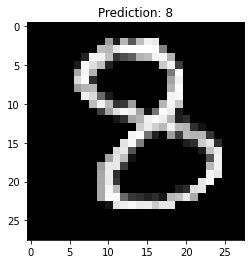

In [ ]:
#@title 3.2.1 Test Custom Input
img_url = '' #@param {type:"string"}
print(img_url)
from PIL import Image, ImageOps
import requests
from io import BytesIO

response = requests.get('https://i.ibb.co/gvBX5B6/b2e4b35b4de1.png'\
                        if img_url == 'value' or img_url == '' else img_url)

# load custom image
img = Image.open(BytesIO(response.content))
img = ImageOps.grayscale(img)
ls = np.array(img.getdata())
print(ls.shape)
plt.imshow(img, cmap='gray')

ls = ls.reshape(1, 784) # reshape
ls = ls.astype('float')
ls /= 255.0 # normalize

# predict
predictions = model.predict(ls)

for p in predictions[0]:
  print(f'{p:.9f}', end = ' ')

plt.title(f'Prediction: {np.argmax(predictions)}')
plt.imshow(img, cmap='gray')